In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop('Serial No.',axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Admit
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [3]:
from sklearn.model_selection import train_test_split
x=data.drop('Admit',axis=1)
y=data.Admit
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Train 
Train and select models in this phase. 

I am using KNN for now.

You can use any model you prefer

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(x_train, y_train)
print('Accuracy=',neigh.score(x_test,y_test))

Accuracy= 0.77


# Save for making predictions
Set the model variable with the model of your choice

In [5]:
model= neigh
model.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [6]:
from joblib import dump
dump(model,'model.jbl')

['model.jbl']

# THESE ARE THE RESULTS OBTAINED FROM THE MODEL


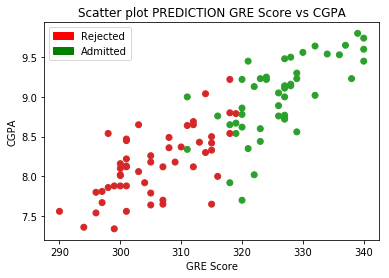

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

predicted = neigh.predict(x_test)                 
colorlist=[]
for i in predicted:
    if i==0: colorlist.append('tab:red')
    else:    colorlist.append('tab:green')
plt.scatter(x=x_test['GRE Score'],y=x_test['CGPA'],c=colorlist)

plt.title('Scatter plot PREDICTION GRE Score vs CGPA')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')

red_patch = mpatches.Patch(color='red', label='Rejected')
green_patch = mpatches.Patch(color='green', label='Admitted')

plt.legend(handles=[red_patch,green_patch])
plt.show()